In [5]:
import os 
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Sowmya\\Personal\\TENSORFLOW\\Tensorflow_stuffs\\data\\train.csv")

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

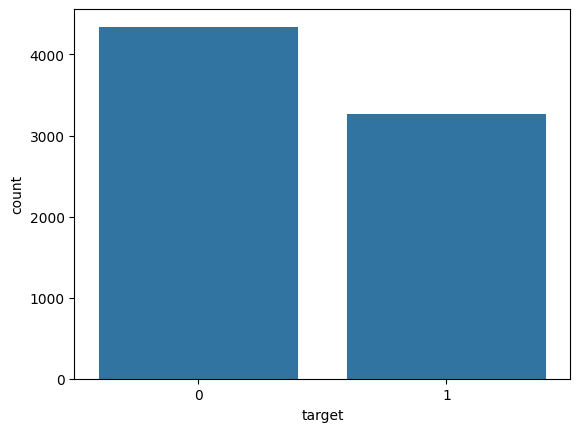

In [8]:
sns.countplot(data=df, x=df['target'])

In [9]:
# Preprocessing
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

# https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
t
@bbcmtd Wholesale Markets ablaze 


In [11]:
df['text'] = df['text'].map(remove_URL)
df['text'] = df['text'].map(remove_punct)

In [12]:
df.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2260927\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
df['text'] = df.text.map(remove_stopwords)

In [16]:
df.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [17]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(df.text)

In [18]:
len(counter)

17971

In [20]:
counter

Counter({'like': 345,
         'im': 299,
         'amp': 298,
         'fire': 250,
         'get': 229,
         'new': 224,
         'via': 220,
         'people': 196,
         'one': 193,
         'news': 193,
         'dont': 191,
         'video': 165,
         'us': 164,
         '2': 159,
         'emergency': 157,
         'disaster': 152,
         'police': 140,
         'would': 131,
         'still': 129,
         'body': 124,
         'burning': 120,
         'crash': 119,
         'back': 119,
         'california': 117,
         'storm': 117,
         'suicide': 116,
         'got': 112,
         'time': 112,
         'know': 112,
         'man': 110,
         'buildings': 110,
         'day': 109,
         'rt': 107,
         'first': 107,
         'see': 105,
         'going': 103,
         'world': 103,
         'bomb': 103,
         'cant': 102,
         'nuclear': 101,
         'love': 100,
         'fires': 100,
         'attack': 99,
         'youtube': 98,
     

In [21]:
counter.most_common(5)

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229)]

In [22]:
num_unique_words = len(counter)

In [23]:
# split data into train and test
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

train_sentence = train_df.text.to_numpy()
train_labels = train_df.target.to_numpy()
val_sentence = val_df.text.to_numpy()
val_labels = val_df.target.to_numpy()

In [24]:
train_sentence.shape, val_sentence.shape

((6090,), (1523,))

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentence)  # fit only to training

In [29]:
word_index = tokenizer.word_index

In [30]:
word_index

{'like': 1,
 'amp': 2,
 'fire': 3,
 'im': 4,
 'get': 5,
 'via': 6,
 'new': 7,
 'people': 8,
 'news': 9,
 'dont': 10,
 'emergency': 11,
 'one': 12,
 '2': 13,
 'us': 14,
 'video': 15,
 'disaster': 16,
 'burning': 17,
 'body': 18,
 'would': 19,
 'buildings': 20,
 'police': 21,
 'crash': 22,
 'first': 23,
 'california': 24,
 'still': 25,
 'man': 26,
 'got': 27,
 'know': 28,
 'day': 29,
 'back': 30,
 'going': 31,
 'two': 32,
 'time': 33,
 'full': 34,
 'accident': 35,
 'see': 36,
 'world': 37,
 'attack': 38,
 'nuclear': 39,
 'youtube': 40,
 'may': 41,
 'love': 42,
 'go': 43,
 'rt': 44,
 'many': 45,
 'cant': 46,
 '3': 47,
 'watch': 48,
 'collapse': 49,
 'dead': 50,
 'today': 51,
 'car': 52,
 'mass': 53,
 'want': 54,
 'years': 55,
 'work': 56,
 'train': 57,
 'last': 58,
 'good': 59,
 'think': 60,
 'families': 61,
 'hiroshima': 62,
 'life': 63,
 'fires': 64,
 'best': 65,
 'could': 66,
 'say': 67,
 'u': 68,
 'death': 69,
 'hot': 70,
 'forest': 71,
 'way': 72,
 'killed': 73,
 'need': 74,
 'legion

In [31]:
train_sequence = tokenizer.texts_to_sequences(train_sentence)
val_sequences = tokenizer.texts_to_sequences(val_sentence)

In [33]:
print(train_sentence[10:15])
print(train_sequence[10:15])

['three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking']
[[520, 8, 395, 156, 297, 411], [749, 470, 2248, 138, 2249, 2813, 521, 611, 188, 470, 2248, 189, 189, 5679, 117], [2814, 117, 1884, 5680, 2248, 1285, 1450, 522, 256, 644, 2815], [99, 3742, 612, 1451, 3742], [111, 91, 336, 3743, 3744, 52, 22, 312]]


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 20

train_padded = pad_sequences(train_sequence, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')
train_padded.shape, val_padded.shape

((6090, 20), (1523, 20))

In [35]:
train_padded[10]

array([520,   8, 395, 156, 297, 411,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [36]:
print(train_sentence[10])
print(train_sequence[10])
print(train_padded[10])

three people died heat wave far
[520, 8, 395, 156, 297, 411]
[520   8 395 156 297 411   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [37]:
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [38]:
reverse_word_index

{1: 'like',
 2: 'amp',
 3: 'fire',
 4: 'im',
 5: 'get',
 6: 'via',
 7: 'new',
 8: 'people',
 9: 'news',
 10: 'dont',
 11: 'emergency',
 12: 'one',
 13: '2',
 14: 'us',
 15: 'video',
 16: 'disaster',
 17: 'burning',
 18: 'body',
 19: 'would',
 20: 'buildings',
 21: 'police',
 22: 'crash',
 23: 'first',
 24: 'california',
 25: 'still',
 26: 'man',
 27: 'got',
 28: 'know',
 29: 'day',
 30: 'back',
 31: 'going',
 32: 'two',
 33: 'time',
 34: 'full',
 35: 'accident',
 36: 'see',
 37: 'world',
 38: 'attack',
 39: 'nuclear',
 40: 'youtube',
 41: 'may',
 42: 'love',
 43: 'go',
 44: 'rt',
 45: 'many',
 46: 'cant',
 47: '3',
 48: 'watch',
 49: 'collapse',
 50: 'dead',
 51: 'today',
 52: 'car',
 53: 'mass',
 54: 'want',
 55: 'years',
 56: 'work',
 57: 'train',
 58: 'last',
 59: 'good',
 60: 'think',
 61: 'families',
 62: 'hiroshima',
 63: 'life',
 64: 'fires',
 65: 'best',
 66: 'could',
 67: 'say',
 68: 'u',
 69: 'death',
 70: 'hot',
 71: 'forest',
 72: 'way',
 73: 'killed',
 74: 'need',
 75: 'le

In [39]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [40]:
decoded_text = decode(train_sequence[10])

print(train_sequence[10])
print(decoded_text)

[520, 8, 395, 156, 297, 411]
three people died heat wave far


In [41]:
from keras import layers

model = keras.models.Sequential()

model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

model.add(layers.LSTM(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

c:\Users\2260927\Anaconda3\envs\deeplearning\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [43]:
model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/20
191/191 - 7s - 34ms/step - accuracy: 0.6903 - loss: 0.5777 - val_accuracy: 0.7859 - val_loss: 0.4889
Epoch 2/20
191/191 - 5s - 25ms/step - accuracy: 0.8798 - loss: 0.3158 - val_accuracy: 0.7663 - val_loss: 0.5026
Epoch 3/20
191/191 - 2s - 13ms/step - accuracy: 0.9401 - loss: 0.1696 - val_accuracy: 0.7728 - val_loss: 0.6709
Epoch 4/20
191/191 - 3s - 13ms/step - accuracy: 0.9639 - loss: 0.1067 - val_accuracy: 0.7610 - val_loss: 0.7380
Epoch 5/20
191/191 - 3s - 16ms/step - accuracy: 0.9713 - loss: 0.0809 - val_accuracy: 0.7525 - val_loss: 1.0257
Epoch 6/20
191/191 - 2s - 13ms/step - accuracy: 0.9762 - loss: 0.0591 - val_accuracy: 0.7400 - val_loss: 1.4887
Epoch 7/20
191/191 - 3s - 15ms/step - accuracy: 0.9798 - loss: 0.0506 - val_accuracy: 0.7295 - val_loss: 1.2715
Epoch 8/20
191/191 - 2s - 13ms/step - accuracy: 0.9821 - loss: 0.0386 - val_accuracy: 0.7433 - val_loss: 6.1756
Epoch 9/20
191/191 - 3s - 13ms/step - accuracy: 0.9823 - loss: 0.0341 - val_accuracy: 0.7380 - val_loss:

In [44]:
predictions = model.predict(train_padded)
predictions = [ 1 if p > 0.5 else 0 for p in predictions]

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [45]:
print(train_sentence[10:20])

print(train_labels[10:20])
print(predictions[10:20])


['three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking' 'whats man' 'love fruits'
 'summer lovely' 'car fast' 'goooooooaaaaaal']
[1 1 1 1 1 0 0 0 0 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
